# Drill Present the same data multiple ways

Thinkful Bootcamp Course

Author: Ian Heaton

Email: iheaton@gmail.com

Mentor: Nemanja Radojkovic

Date: 2017/02/10

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import us
from collections import Counter
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

The data set used for this drill comes from kaggle; United States Energy, Census, and GDP 2010-2014.

https://www.kaggle.com/lislejoem/us_energy_census_gdp_10-14

The data set consists of three different types of data:

    1. Census and Geographic Data
    2. Energy Data
    3. Economic Data
    
Energy production and consumption are described in BTUs. The British thermal unit (Btu or BTU) is a traditional unit of heat; it is defined as the amount of heat required to raise the temperature of one pound of water by one degree Fahrenheit.

In [13]:
cs_df = pd.read_csv('/media/ianh/space/ThinkfulData/USEnergyCensusGDP/ECEDUS2010-2014.csv')
cs_df.shape
cs_df.head()

,StateCodes,State,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,...,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014
0,AL,Alabama,3.0,6.0,1.0,0.0,1931522,1905207,1879716,1919365,...,1.165832,1.157861,-0.020443,-0.168414,0.396416,0.420102,1.011941,1.001333,1.562247,1.577963
1,AK,Alaksa,4.0,9.0,1.0,0.0,653221,653637,649341,621107,...,3.203618,2.869760,-1.175137,-1.949571,-3.789313,-13.754494,0.948185,1.835376,-0.585695,-10.884734
2,AZ,Arizona,3.0,7.0,0.0,0.0,1383531,1424944,1395839,1414383,...,1.090035,1.091283,1.341472,-0.420875,-0.580562,-1.313050,2.317801,0.621971,0.509473,-0.221767
3,AR,Arkansas,4.0,8.0,0.0,0.0,1120632,1122544,1067642,1096438,...,2.141877,2.129805,1.369514,5.131282,3.910476,6.280636,3.336628,7.155212,6.052353,8.410441
4,CA,California,4.0,9.0,1.0,0.0,7760629,7777115,7564063,7665241,...,4.207353,4.177389,-1.162079,-1.173951,-1.341226,-0.830982,2.761377,2.772770,2.866127,3.346406


## 1. Choose one variable and plot that variable four different ways

In [26]:
CoalC_df = cs_df[['StateCodes', 'CoalC2014']]
CoalC_df = CoalC_df = CoalC_df[:-1]

In [27]:
CoalC_df = CoalC_df.sort_values('CoalC2014')

The column CoalC2014 is the total coal consumption in billion BTU in given year for each state in the union.
The last row of the resulting the data frame is dropped. This row contains the summation of coal consumption for all the states.

### Bar Graph

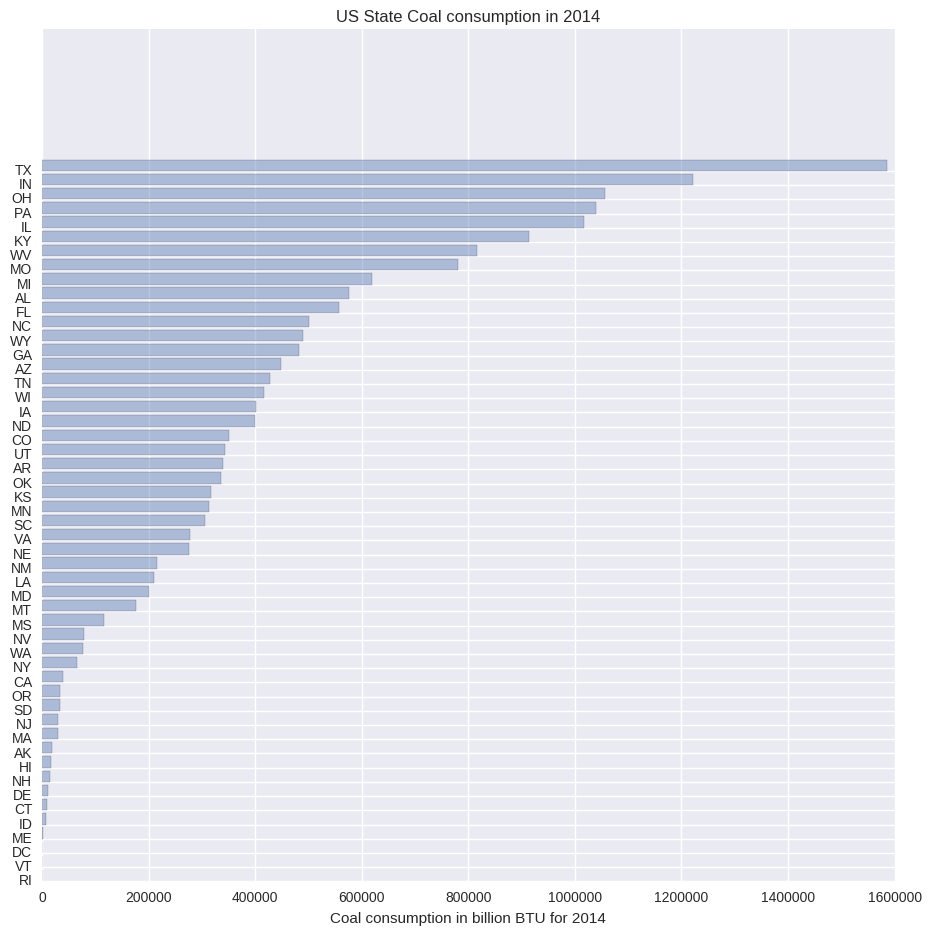

In [28]:
plt.figure(figsize=(11,11))
y_pos = np.arange(len(CoalC_df['StateCodes']))
plt.barh(y_pos, CoalC_df['CoalC2014'], alpha=0.4)
plt.yticks(y_pos, CoalC_df['StateCodes'])
plt.xlabel('Coal consumption in billion BTU for 2014')
plt.title('US State Coal consumption in 2014')
plt.show()

A bar graph is used to visualize differences in a variable between items. This case the coal consumption of US states in 2014.  By ordering the data is becomes very apparent fast which states consume the most coal and those that do not.  A disadvantage of the bra graph is that nothing else can be learned from the data. Perhaps the only plot that can be used for nominal data.  

### Histogram

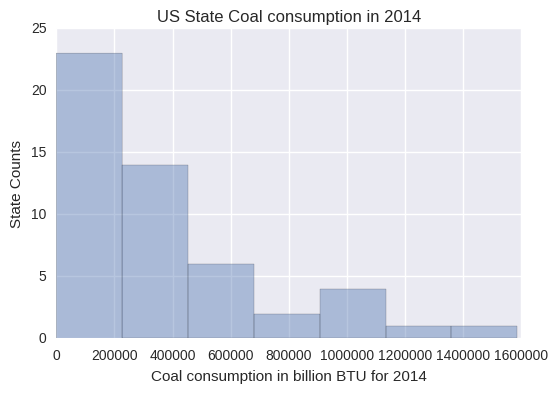

In [35]:
ax = sns.distplot(CoalC_df['CoalC2014'], kde=False)
ax.set(xlabel='Coal consumption in billion BTU for 2014', ylabel='State Counts')
sns.plt.title('US State Coal consumption in 2014')
plt.show()

A histogram reveals the distribution of a dataset and the count of items at each bin.  There are better ways to visualize outliers and the individual values at each index.   Very useful for exploratory data analysis.

### Boxplot

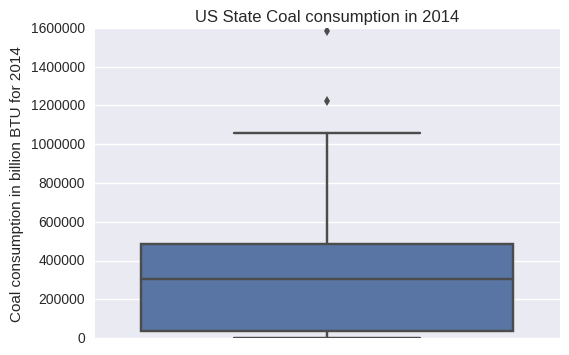

In [38]:
ax = sns.boxplot(y="CoalC2014", data=CoalC_df)
ax.set(ylabel='Coal consumption in billion BTU for 2014')
sns.plt.title('US State Coal consumption in 2014')
plt.show()

The box plot's only use is to display the distribution of data about the median, first and third quartile and any outliers. Great for depicting the range of data.

### Kernel density estimaton

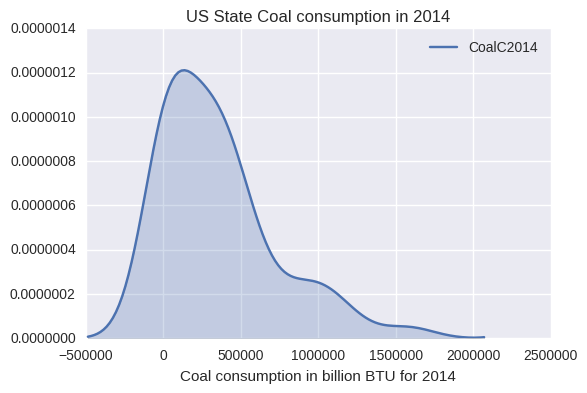

In [47]:
ax = sns.kdeplot(CoalC_df['CoalC2014'], shade=True)
ax.set(xlabel='Coal consumption in billion BTU for 2014')
sns.plt.title('US State Coal consumption in 2014')
plt.show()

The KDE plot is very useful for depicting the distribution of a dataset yet very poor at showing the values at a particular point in the curve. For some the right hand side of the x axis may be misleading if  the dataset only contains positive values.

## 2. Choose two continuous variables, and plot them three different ways

For this portion we will visualize the total energy production and consumption for each state.

TotalC2014: Total energy consumption in billion BTU in the year 2014.

TotalP2014: Total energy production in billion BTU in the year 2014.

In [54]:
CPEnergy_df = cs_df[['StateCodes', 'TotalC2014', 'TotalP2014']]
CPEnergy_df = CPEnergy_df[:-1]

### Scatter Plot

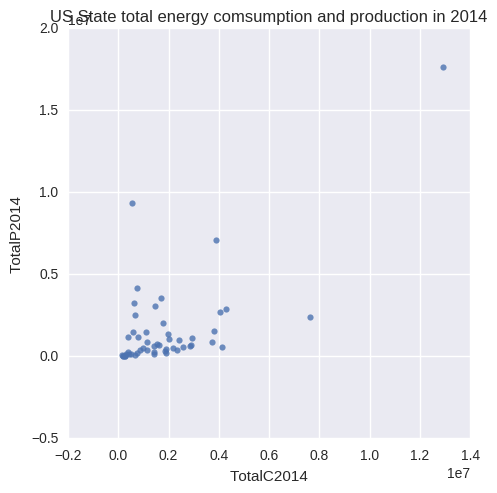

In [64]:
sns.lmplot(x="TotalC2014", y="TotalP2014", data=CPEnergy_df, fit_reg=False)
sns.plt.title('US State total energy comsumption and production in 2014')
plt.show()

The scatter plot is useful for looking for associations between two variables.  The obvious downside to the scatter plot is discerning multiple points when the datasets are clumped together tightly within a single region of the plot.   

### Hexbin plots

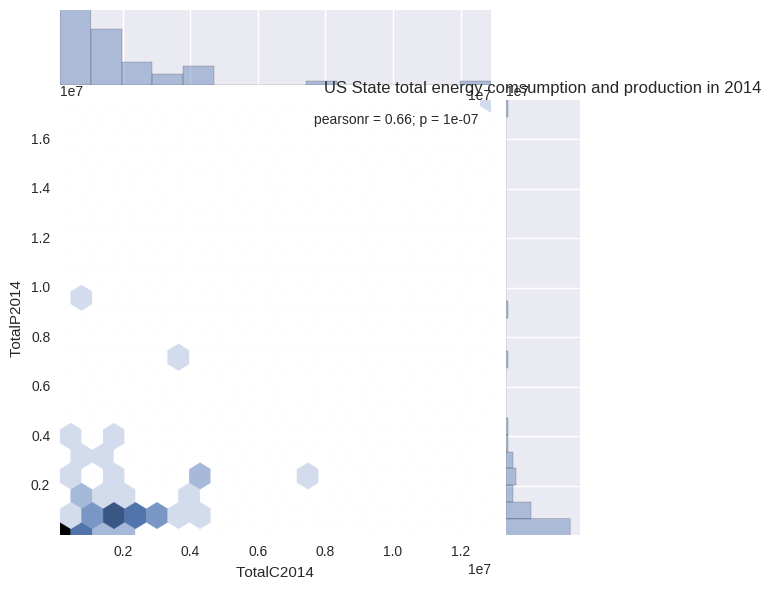

In [71]:
sns.jointplot(x="TotalC2014", y="TotalP2014", data=CPEnergy_df, kind="hex")
sns.plt.title('US State total energy comsumption and production in 2014')
plt.show()

A Hexbin plot shows the counts of observations within hexagonal bins via a darker shade of color.
This plot would appear to work best with relatively large datasets.
In addition, this plot is simpler to discern than two two histograms drawn on top of each other.

### Joint Kernel density estimation

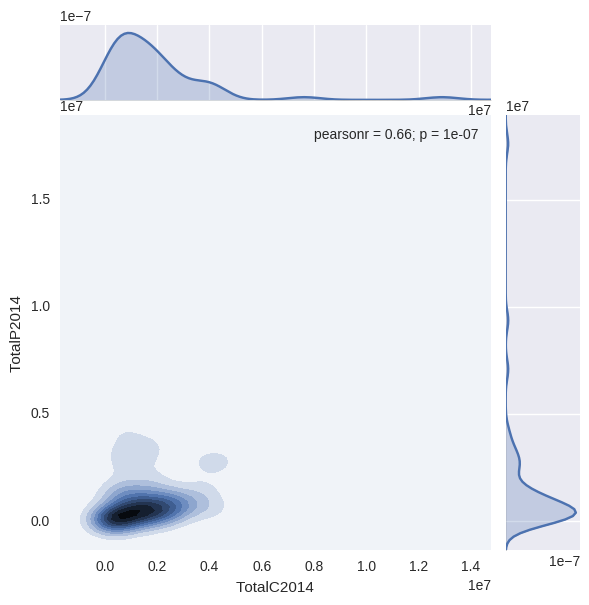

In [70]:
sns.jointplot(x="TotalC2014", y="TotalP2014", data=CPEnergy_df, kind="kde");

Displays two variables as a color map with the higher density of values shown in a dark color and those areas of the distribution with a lower density of values in lighter colors.  Great for depicting where the values for two datasets overlap. For this dataset a scatter plot contains too many values that have the same x and y coordinate making it difficult to differentiate individual points. Can be harder to see if a association exists between datasets unless the association is very strong  a perfect negative or positive association. 

## 3. Choose one continuous variable and one categorical variable, and plot them six different ways.